<a href="https://colab.research.google.com/github/asepmuhidin/AI-UPB/blob/main/Implementasi_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merancang sistem kontrol durasi pencucian pada mesin cuci berdasarkan berat pakaian dan intensitas kotoran.

### Dosen Pengampu : Asep Muhidin, S.Kom., M.Kom.

In [1]:
#INSTALL scikit-fuzzy
! pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.9 MB/s eta 0:00:00


In [25]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


## Define linguistic variables (inputs and output)

In [70]:
berat_pakaian = ctrl.Antecedent(np.arange(0, 10, 0.1), 'berat_pakaian')
intensitas_kotoran= ctrl.Antecedent(np.arange(0, 101, 1), 'intensitas_kotoran')
durasi_cuci = ctrl.Consequent(np.arange(0, 101, 1), 'durasi_cuci')

##  Membership functions

In [73]:
# Untuk anggota berat pakaian
berat_pakaian['ringan'] = fuzz.trapmf(berat_pakaian.universe, [0,0, 2, 4])
berat_pakaian['sedang'] = fuzz.trapmf(berat_pakaian.universe, [2, 4,5, 7])
berat_pakaian['tinggi'] = fuzz.trapmf(berat_pakaian.universe, [5, 7, 9,9])

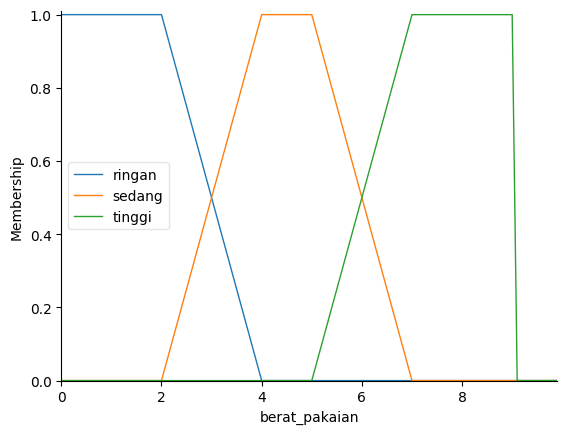

In [72]:
berat_pakaian.view()

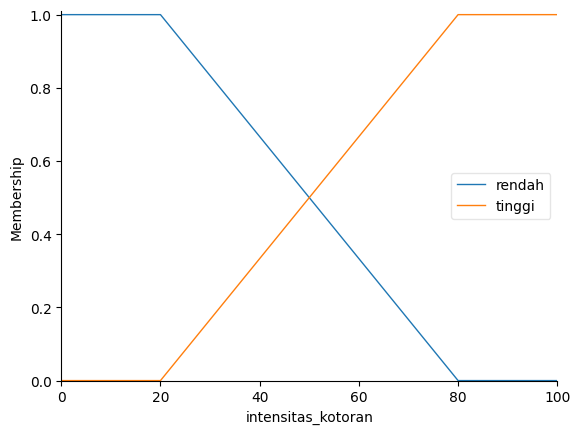

In [74]:
# Untuk anggota intensitas kotoran
intensitas_kotoran['rendah'] = fuzz.trapmf(intensitas_kotoran.universe, [0,0, 20, 80])
intensitas_kotoran['tinggi'] = fuzz.trapmf(intensitas_kotoran.universe, [20, 80,100, 100])
intensitas_kotoran.view()

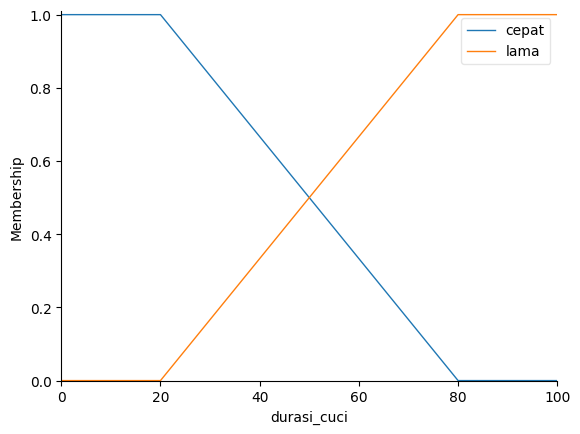

In [75]:
# Untuk anggota durasi cuci
durasi_cuci['cepat'] = fuzz.trapmf(durasi_cuci.universe, [0,0, 20, 80])
durasi_cuci['lama'] = fuzz.trapmf(durasi_cuci.universe, [20, 80,100, 100])
durasi_cuci.view()

## Define fuzzy rules

In [76]:
rule1 = ctrl.Rule(berat_pakaian['ringan'] & intensitas_kotoran['rendah'], durasi_cuci['cepat'])
rule2 = ctrl.Rule(berat_pakaian['ringan'] & intensitas_kotoran['tinggi'], durasi_cuci['cepat'])
rule3 = ctrl.Rule(berat_pakaian['sedang'] & intensitas_kotoran['rendah'], durasi_cuci['cepat'])
rule4 = ctrl.Rule(berat_pakaian['sedang'] & intensitas_kotoran['tinggi'], durasi_cuci['lama'])
rule5 = ctrl.Rule(berat_pakaian['tinggi'] & intensitas_kotoran['rendah'], durasi_cuci['lama'])
rule6 = ctrl.Rule(berat_pakaian['tinggi'] & intensitas_kotoran['tinggi'], durasi_cuci['lama'])


##  Control system

In [77]:
mesin_cuci_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6])
mesin_cuci_simulation = ctrl.ControlSystemSimulation(mesin_cuci_ctrl)

##  Input values and perform computation

In [78]:
#BP : Berat pakaian, #IK :Intensitas kotoran
BP,IK=6.3, 45

In [79]:
# Input values
mesin_cuci_simulation.input['berat_pakaian'] = BP  # Example temperature (°C)
mesin_cuci_simulation.input['intensitas_kotoran'] = IK    # Example humidity (%)

# Perform computation
mesin_cuci_simulation.compute()

Input Berat Pakaian : 6.3 kg
Input Intensitas Kotoran : 45 %
Hasil Durasi Cuci (menit) = 56.137788778877855


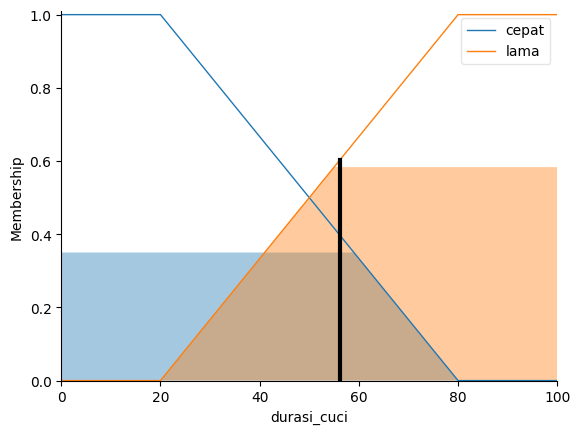

In [80]:
# Tampilkan hasil
print(f"Input Berat Pakaian : {BP} kg")
print(f"Input Intensitas Kotoran : {IK} %")
print("Hasil Durasi Cuci (menit) =", mesin_cuci_simulation.output['durasi_cuci'])

# Visualisasi hasil defuzzifikasi
durasi_cuci.view(sim=mesin_cuci_simulation)
plt.show()